In [113]:
!pip install konlpy

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [115]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f9e1e41d5d0>)

In [116]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [117]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 150000


In [118]:
train_data[:15] # 상위 15개 출력

# label 1 : 긍정 , 0 : 부정

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


## 데이터 정제하기

In [119]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [120]:
train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [121]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146183 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        146183 non-null  int64 
 1   document  146182 non-null  object
 2   label     146183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


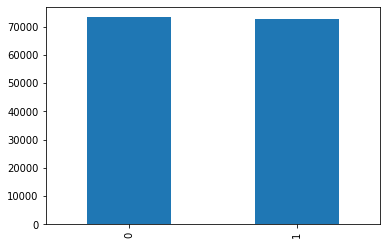

In [122]:
# 편향 확인
train_data['label'].value_counts().plot(kind = 'bar')

In [123]:
print(train_data.isnull().values.any())

True


In [124]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [125]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [126]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [127]:
print(len(train_data))

146182


In [128]:
## 테스트 데이터 확인

In [129]:
print('훈련용 리뷰 개수 :',len(test_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 50000


In [130]:
test_data['document'].nunique(), test_data['label'].nunique()

(49157, 2)

In [131]:
test_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [132]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49158 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49158 non-null  int64 
 1   document  49157 non-null  object
 2   label     49158 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


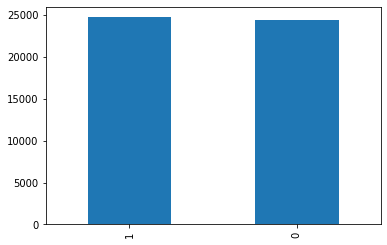

In [133]:
# 편향 확인
test_data['label'].value_counts().plot(kind = 'bar')

In [134]:
print(test_data.isnull().values.any())

True


In [135]:
print(test_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [136]:
test_data.loc[test_data.document.isnull()]

,id,document,label
5746,402110,NaN,1


In [137]:
test_data = test_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(test_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [138]:
print(len(test_data))

49157


In [139]:
# 데이터 정제
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [140]:
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [141]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


In [142]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [143]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


In [144]:
## 작업량 줄이기(데이터가 너무 많아 돌리는데 시간이 오래걸림)
# 작업량이 줄어 결과물이 안좋음

train_data= train_data[:3000]
test_data= test_data[:3000]

## 토큰화

In [145]:
# 뺄 단어들 추가
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [146]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)
# 문장의 단어 토큰화

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [147]:
# 트레인 데이터 리뷰별 리스트로 묶어 토큰화
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)


100%|██████████| 3000/3000 [00:11<00:00, 263.48it/s]


In [148]:
print(X_train[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [149]:
# 테스트데이터 토큰화
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 3000/3000 [00:10<00:00, 282.06it/s]


## 정수 인코딩

In [150]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# 단어 집합 생성(단어별 고유의 인덱스가 부여됨)
# 인덱스는 빈도수가 높은 순서로 부여 됨, 인덱스가 클수록 빈도수가 매우 낮음

In [151]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '다': 8, '만': 9, '정말': 10, '같다': 11, '재밌다': 12, '너무': 13, '진짜': 14, '되다': 15, '적': 16, '아니다': 17, '점': 18, '나오다': 19, '않다': 20, '안': 21, '로': 22, '에서': 23, '인': 24, '평점': 25, '만들다': 26, '연기': 27, '나': 28, '것': 29, '최고': 30, '사람': 31, '드라마': 32, '못': 33, '고': 34, '보고': 35, '내': 36, '그': 37, '말': 38, '스토리': 39, '왜': 40, '생각': 41, '아깝다': 42, '게': 43, '때': 44, '감동': 45, '감독': 46, 'ㅋㅋ': 47, '배우': 48, '하고': 49, '더': 50, '재미있다': 51, '거': 52, '시간': 53, '이렇다': 54, '재미없다': 55, '재미': 56, '그냥': 57, '내용': 58, '주다': 59, '요': 60, '아': 61, '가다': 62, '그렇다': 63, '까지': 64, '지루하다': 65, '네': 66, '사랑': 67, '중': 68, '모르다': 69, '들다': 70, '쓰레기': 71, '뭐': 72, '싶다': 73, '작품': 74, '알다': 75, '볼': 76, '이건': 77, '자다': 78, '주인공': 79, '정도': 80, '지': 81, '수': 82, '이렇게': 83, '하나': 84, '액션': 85, '완전': 86, '돈': 87, '마지막': 88, 'ㅋㅋㅋ': 89, '기': 90, 'ㅠㅠ': 91, '다시': 92, 'ㅋ': 93, '차다': 94, '또': 95, '남다': 96, '역시': 97, '넘다': 98, '라': 99, '인데': 100, '최악': 101, '년': 102

In [152]:
# 빈도수가 낮은 단어를 자연어 처리에서 배제함
# 등장 빈도수가 3회 미만인 단어의 비중 확인
threshold = 3 # 빈도수
total_cnt = len(tokenizer.word_index) # 총 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s회 미만인 희귀 단어의 수: %s'%(threshold, rare_cnt))
print("단어 집합에서 희귀 단어의 비율: ", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 6465
등장 빈도가 3회 미만인 희귀 단어의 수: 4642
단어 집합에서 희귀 단어의 비율:  71.80201082753287
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 17.12809603403738


In [153]:
total_cnt

6465

In [154]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1824


In [155]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [156]:
print(X_train[:3])

[[61, 564, 14, 183, 932], [710, 389, 35, 565, 1, 184, 1108, 27, 1109, 813, 20], [364, 1371, 2, 200, 8]]


In [157]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

## 빈 샘플 제거

In [158]:
## 빈도수가 낮은 단어삭제는 빈도수가 낮은 단어로만 구성된 샘플이 NaN값이 됨
# NaN 테이블 따로 분류
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [159]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

2972
2972


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## 패딩

리뷰의 최대 길이 : 44
리뷰의 평균 길이 : 9.175302826379543


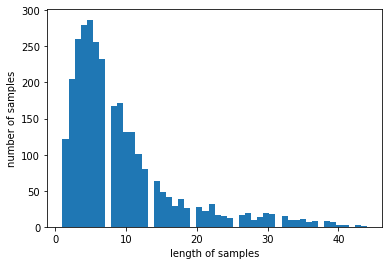

In [160]:
# 패딩 : 서로 다른길이의 샘플의 길이를 맞춰주는 작업을 위해 리뷰의 길이 확인
print('리뷰의 최대 길이 :',max(len(l) for l in X_train)) # 단어 토큰 갯수 확인
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50) # 그래프로 도식화
plt.xlabel('length of samples') # 단어 길이
plt.ylabel('number of samples') # 리뷰 갯수
plt.show()

In [161]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [162]:
max_len = 30
below_threshold_len(max_len, X_train)
# 샘플길이 30이하인 샘플이 96%로 30으로 셋팅

전체 샘플 중 길이가 30 이하인 샘플의 비율: 96.60161507402422


In [163]:
# 길이 제한(긴건 자르고 짧은건 패딩으로 맞춰줌)
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

## LSTM으로 네이버 영화 리뷰 감성 분류하기

In [164]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [165]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [166]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# es : 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)합니다. 
# mc : 또한, ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.

In [167]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
38/38 [==============================] - 6s 113ms/step - loss: 0.6574 - acc: 0.6155 - val_loss: 0.5759 - val_acc: 0.7210

Epoch 00001: val_acc improved from -inf to 0.72101, saving model to best_model.h5
Epoch 2/15
38/38 [==============================] - 3s 79ms/step - loss: 0.4713 - acc: 0.7951 - val_loss: 0.5048 - val_acc: 0.7613

Epoch 00002: val_acc improved from 0.72101 to 0.76134, saving model to best_model.h5
Epoch 3/15
38/38 [==============================] - 3s 80ms/step - loss: 0.3539 - acc: 0.8612 - val_loss: 0.4997 - val_acc: 0.7664

Epoch 00003: val_acc improved from 0.76134 to 0.76639, saving model to best_model.h5
Epoch 4/15
38/38 [==============================] - 3s 79ms/step - loss: 0.2889 - acc: 0.8847 - val_loss: 0.4942 - val_acc: 0.7748

Epoch 00004: val_acc improved from 0.76639 to 0.77479, saving model to best_model.h5
Epoch 5/15
38/38 [==============================] - 3s 83ms/step - loss: 0.2404 - acc: 0.9045 - val_loss: 0.5339 - val_acc: 0.7748

Ep

In [168]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

94/94 [==============================] - 2s 12ms/step - loss: 0.5322 - acc: 0.7703

 테스트 정확도: 0.7703


## 리뷰 예측해보기

In [169]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [170]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

54.57% 확률로 긍정 리뷰입니다.



In [171]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

65.22% 확률로 부정 리뷰입니다.



In [172]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

99.61% 확률로 부정 리뷰입니다.



In [173]:
sentiment_predict('감독 뭐하는 놈이냐?')

96.39% 확률로 부정 리뷰입니다.



In [174]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

63.56% 확률로 부정 리뷰입니다.

